<a href="https://colab.research.google.com/github/theodoral22/Exercise4_AI_MNIST/blob/main/%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B14%CE%A4%CE%B5%CF%87%CE%BD%CE%B7%CF%84%CE%AE%CE%9D%CE%BF%CE%B7%CE%BC%CE%BF%CF%83%CF%8D%CE%BD%CE%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

# Setting Environment Seeds

Seeds enable the reproduction of the experiments.

In [ ]:
random.seed(0)
np.random.seed(seed=0)
tf.random.set_seed(seed=0)

# Load MNIST Dataset using Tensorflow

In [ ]:
(x_train, y_train), (x_test, y_test ) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

print(
    f'Training Size - Inputs:{x_train.shape}, Targets:{y_train.shape}'
    f'\nTest Size - Inputs:{x_test.shape}, Targets:{y_test.shape}'
)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training Size - Inputs:(60000, 28, 28), Targets:(60000,)
Test Size - Inputs:(10000, 28, 28), Targets:(10000,)


# Displaying Random Digits

In [ ]:
rows = 5
digits_per_row = 5

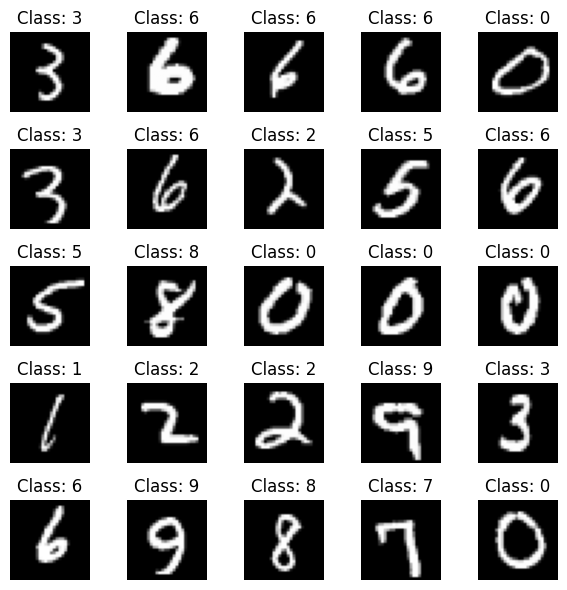

In [ ]:
fig, axes = plt.subplots(nrows=rows, ncols=digits_per_row, figsize=(6, 6))
axes = axes.flatten()

# Selecting random ids from 0 to 60000
total_digits = rows*digits_per_row
random_ids= np.random.choice(x_train.shape[0], total_digits, replace=False)

# Plotting the selected digits.
for i, ax in enumerate(axes):
    idx = random_ids[i]
    ax.imshow(x_train[idx], cmap='gray')
    ax.set_title(f'Class: {y_train[idx]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# Preprocessing Inputs


*   Deep Neural Networks require vectors are inputs. Since the digits are 28x28
*   One-hot Encoding is required for targets, since we use 10 classes. (e.g. 0 will be classified as 0 0 0 0 0 0 0 0 0 1, one will be classified as 0 0 0 0 0 0 0 0 1 0, etc.

grayscale images, they should be converted to vectors of 784 size.

In [ ]:
x_train = x_train.reshape((60000, 784))
y_train = tf.one_hot(y_train, depth=10)
x_test = x_test.reshape((10000, 784))
y_test = tf.one_hot(y_test, depth=10)

print(
    f'Training Size - Inputs:{x_train.shape}, Targets:{y_train.shape}'
    f'\nTest Size - Inputs:{x_test.shape}, Targets:{y_test.shape}'
)

Training Size - Inputs:(60000, 784), Targets:(60000, 10)
Test Size - Inputs:(10000, 784), Targets:(10000, 10)


# Construct Deep Neural Network





*   Input: 784 Features
*   Hiddens: 2 Hiddens of 256 units, which pass through tanh activation.
*   Output: 10 probabilities (1 for each class). Softmax activation is required to convert the network's outputs into probabilities.



In [ ]:
activation = 'tanh'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 10

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
model.summary(expand_nested=True)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden-1 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-2 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.5640 - loss: 1.3873 - val_accuracy: 0.8649 - val_loss: 0.5203
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.8684 - loss: 0.4970 - val_accuracy: 0.8944 - val_loss: 0.3910
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8926 - loss: 0.3894 - val_accuracy: 0.9056 - val_loss: 0.3364
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9053 - loss: 0.3382 - val_accuracy: 0.9140 - val_loss: 0.3062
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9139 - loss: 0.3066 - val_accuracy: 0.9163 - val_loss: 0.2871
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9219 - loss: 0.2812 - val_accuracy: 0.9226 - val_loss: 0.2700
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9258 - loss: 0.2636 - val_accuracy: 0.9263 - val_loss: 0.2531
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9299 - loss: 0.

# Display Loss and Accuracy per Training Epoch

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

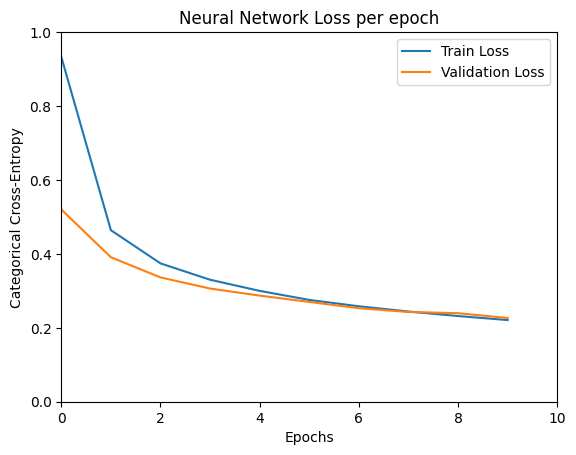

In [ ]:
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Neural Network Loss per epoch')
plt.ylabel('Categorical Cross-Entropy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

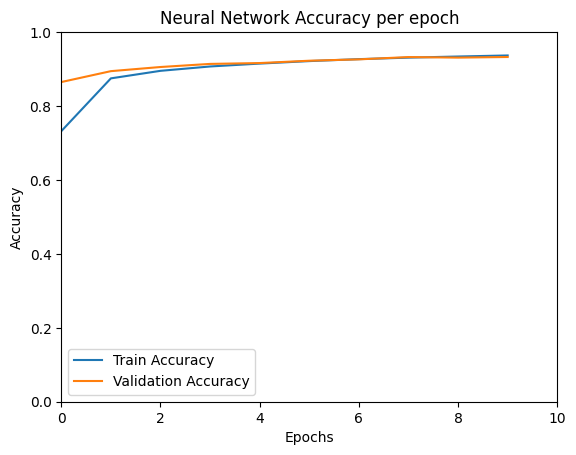

In [ ]:
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Neural Network Accuracy per epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

# --- TODOs ---

## 1. Hyperparameter Tuning: Try adjusting number of hidden layers, hidden units, activation function, learning rate, number of epochs, etc.


In [ ]:
tests=[
    #layers: αριθμός επιπέδων ενεργοποίησης
    #neurons: αριθμός νευρώνων σε κάθε επίπεδο
    #lr (Learning Rate): ρυθμός μάθησης
    #epochs: αριθμός εποχών εκπαίδευσης
    #activation: συνάρτηση ενεργοποίησης
    {'layers': 2, 'neurons': [256, 256], 'lr': 0.001, 'epochs': 10, 'activation': 'tanh'},
    {'layers': 2, 'neurons': [512, 512], 'lr': 0.001, 'epochs': 10, 'activation': 'relu'},
    {'layers': 3, 'neurons': [512, 256, 128], 'lr': 0.001, 'epochs': 15, 'activation': 'relu'},
    {'layers': 2, 'neurons': [128, 128], 'lr': 0.001, 'epochs': 10, 'activation': 'sigmoid'},
    {'layers': 3, 'neurons': [256, 256, 256], 'lr': 0.005, 'epochs': 20, 'activation': 'tanh'},
    {'layers': 1, 'neurons': [512], 'lr': 0.0005, 'epochs': 15, 'activation': 'relu'}
]

#λίστα για αποθήκευση αποτελεσμάτων
results=[]

#εκπαίδευση και αξιολόγηση του κάθε μοντέλου
for i, config in enumerate(tests,1):
  print (f"Training model {i}")

  #δημιουργία του μοντέλου ως διαδοχική στοίβα
  model=tf.keras.Sequential()

  #προσθήκη του input layer με μέγεθος 784 (γιατί έχω 28x28 εικόνες)
  model.add(tf.keras.layers.Input(shape=(784,)))

  #προσθήκη των κρυφών επιπέδων
  for units in config['neurons']:
    model.add(tf.keras.layers.Dense(units, activation=config['activation']))

  #προσθήκη του τελικού επιπέδου εξόδου με 10 κατηγορίες
  #το softmax είναι για ταξινόμηση
  model.add(tf.keras.layers.Dense(10, activation='softmax'))

  #ορισμός του optimizer με συγκεκριμένο ρυθμό μάθησης
  optimizer = tf.keras.optimizers.SGD(learning_rate=config['lr'])

  #σύνταξη του μοντέλου
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  #εκπαίδευση του μοντέλου
  history = model.fit(
      x_train, y_train,
      validation_data=(x_test, y_test),
      epochs=config['epochs'],
  )

  #παίρνω το τελευταίο validation accuracy
  val_acc = history.history['val_accuracy'][-1]

  #αποθηκεύω στην λίστα results τα αποτελέσματα
  results.append({
      'Test': i,
      'Hidden Layers': config['layers'],
      'Neurons': '-'.join(map(str, config['neurons'])),
      'Activation': config['activation'],
      'LR': config['lr'],
      'Epochs': config['epochs'],
      'Accuracy': round(val_acc, 4)
  })

#μετατροπή της λίστας σε DataFrame
results_df = pd.DataFrame(results)

#εμφάνιση του πίνακα αποτελεσμάτων
print(results_df)

Training model 1
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5614 - loss: 1.4126 - val_accuracy: 0.8580 - val_loss: 0.5434
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8604 - loss: 0.5123 - val_accuracy: 0.8873 - val_loss: 0.4033
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8883 - loss: 0.4010 - val_accuracy: 0.9039 - val_loss: 0.3424
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9038 - loss: 0.3439 - val_accuracy: 0.9119 - val_loss: 0.3099
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9124 - loss: 0.3108 - val_accuracy: 0.9181 - val_loss: 0.2889
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9192 - loss: 0.2879 - val_accuracy: 0.9216 - val_loss: 0.2694
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9241 - loss: 0.2683 - val_accuracy: 0.9233 - val_loss: 0.2600
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy:



*   **Τιμές layers:** δοκιμάστηκαν 1, 2 και 3 επίπεδα, καθώς περισσότερα επίπεδα δίνουν στο μοντέλο τη δυνατότητα να μάθει πιο σύνθετα μοτίβα.
*   **Τιμές neurons:** δοκιμάστηκαν τιμές όπως 128, 256 και 512, καθώς περισσότεροι νευρώνες σημαίνουν περισσότερη υπολογιστική ισχύ και δυνατότητα μάθησης.
*   **Τιμές activation:** δοκιμάστηκαν τιμές 'relu', 'tanh' και 'sigmoid'. Η 'ReLU'  είναι η πιο συνθησμένη γιατί αποφεύγει προβλήματα και μαθαίνει γρήγορα. Η 'tanh' δίνει εξόδους ανάμεσα σε -1 και 1 και χρησιμοποιείται σε πιο ισορροπημένα δίκτυα. Η 'sigmoid' χρησιμοποιείται σπάνια σε κρυφά επίπεδα.
*   **Τιμές lr:** δοκιμάστηκαν τιμές όπως 0.001, 0.005, 0.0005, καθώς ένας μικρός ρυθμός μάθησης μαθαίνει πιο σταθερά αλλά και πιο αργά, ενώ ένας μεγαλύτερος μπορεί να επισπεύσει την εκπαίδευση αλλά να οδηγήσει σε αστάθεια. Έτσι, δοκιμάζουμε και μεγάλες τιμές και μικρές για να εντοπιστεί η πιο σταθερή και αποδοτική τιμή.
*   **Τιμές epochs:** δοκιμάστηκαν τιμές όπως 10, 15 και 20. Λίγες εποχές μπορεί να μην επιτρέψουν στο δίκτυο να μάθει καλά, ενώ πολλές εποχές μπορεί να οδηγήσουν σε overfitting.

Γενικότερα, οι διάφορες τιμές που δοκιμάστηκαν είχαν σκοπό να συγκρίνουν μοντέλα με διαφορετική πολυπλοκότητα και να εντοπίσουν το βέλτιστο μοντέλο με την υψηλότερη ακρίβεια και χωρίς υπερεκπαίδευση.



## 2. Validation: Show 1 misclassified digit from each class.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


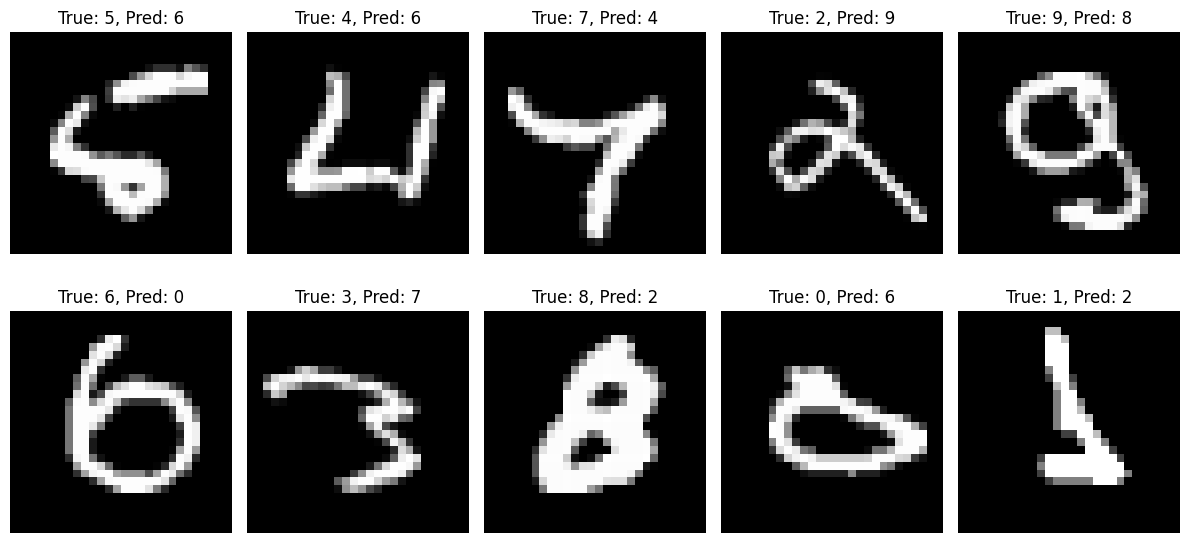

In [ ]:
#κάνω προβλέψεις
predictions = model.predict(x_test)

#για κάθε πρόβλεψη βρίσκω την προβλεπόμενη κλάση
predicted_classes = np.argmax(predictions, axis=1)

#για κάθε πρόβλψη βρίσκω την πραγματική κλάση
true_classes = np.argmax(y_test, axis=1)

#εντοπίζω τις λανθασμένες προβλέψεις
misclassified_indices = np.where(predicted_classes != true_classes)[0]

#κρατάω το λάθος ανά κλάση σε ένα λεξικό
misclassified_by_class = {}

#για κάθε λάθος παίρνω την πραγματική ετικέτα (true_label) και την εσφαλμένη πρόβλεψη (pred_label)
for idx in misclassified_indices:
    true_label = true_classes[idx]
    pred_label = predicted_classes[idx]

    #αν δεν έχω αποθηκεύσει ήδη το λάθος, το αποθηκεύω στο λεξικό
    if true_label not in misclassified_by_class:
        misclassified_by_class[true_label] = (x_test[idx], true_label, pred_label)

    #σταμάταω όταν έχω βρει ένα λάθος για κάθε κλάση
    if len(misclassified_by_class) == 10:
        break

#εμφανίζω τα λάθη
plt.figure(figsize=(12, 6))
for i, (true_label, (img, true_lbl, pred_lbl)) in enumerate(misclassified_by_class.items()):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_lbl}, Pred: {pred_lbl}")
    plt.axis('off')
plt.tight_layout()
plt.show()


## 3. Suggest & Implement workflow improvements, aside hyperparameter tuning. Can you think of any ways to increase the overall accuracy of the Neural Network?

Θα χρησιμοποιήσω Dropout, μία μέθοδο που βοηθάει το δίκτυο να γενικεύει καλύτερα και να έχει καλύτερη απόδοση στα test δεδομένα, μειώνοντας την πιθανότητα overfitting. Συγκεκριμένα, σε κάθε εποχή απενεργοποιείται ένα ποσοστό νευρώνων, με τυχαίο τρόπο. Αυτό έχει ως αποτέλεσμα το δίκτυο να μαθαίνει να μη βασίζεται υπερβολικά σε συγκεκριμένουν νευρώνες.

Βελτιώνω το τρίτο μοντέλο του παραπάνω κώδικα, δηλαδή το test 3, προσθέτοντας Dropout(0.3) μετά από κάθε κρυφό επίπεδο.



In [ ]:
#δημιουργώ ένα διαδοχικό μοντέλο νευρωνικού δικτύου
model = tf.keras.Sequential()

#προσθέτω το input layer για δεδομένα εισόδου με 784 χαρακτηριστικά, αφού έχω εικόνες 28x28
model.add(tf.keras.layers.Input(shape=(784,)))

#κρυφά επίπεδα με dropout
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))

#έξοδος με 10 νευρώνες
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#βελτιστοποιητής με ρυθμό μάθησης 0.0001
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

#σύνταξη του μοντέλου
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#εκπαίδευση του μοντέλου
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

#τελική ακρίβεια από το validation set
val_acc = history.history['val_accuracy'][-1]
print("Validation Accuracy with Dropout:", round(val_acc, 4))


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.5097 - loss: 6.3428 - val_accuracy: 0.8533 - val_loss: 0.5167
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7489 - loss: 0.8326 - val_accuracy: 0.9017 - val_loss: 0.3563
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8190 - loss: 0.6043 - val_accuracy: 0.9236 - val_loss: 0.2774
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8523 - loss: 0.5042 - val_accuracy: 0.9324 - val_loss: 0.2442
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.8735 - loss: 0.4405 - val_accuracy: 0.9377 - val_loss: 0.2182
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8881 - loss: 0.3920 - val_accuracy: 0.9430 - val_loss: 0.2019
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8972 - loss: 0.3551 - val_accuracy: 0.9468 - val_loss: 0.1928
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9061 - loss:

Αποτελέσματα:


*   **Χωρίς Dropout:** η ακρίβεια είναι 0.9566
*   **Με Dropout:** η ακρίβεια είναι 0.962



Απαντήσεις ερωτήσεων κατανόησης


a. Τα δεδομένα της MNIST είναι κατάλληλα για την εκπαίδευση ενός μοντέλου και τον πειραματισμό. Πιο συγκεκριμένα, περιέχουν 10 κλάσεις ψηφίων (0-9) με 60.000 εικόνες για εκπαίδευση και 10.000 εικόνες για δοκιμή, είναι καθαρά προεπεξεργασμένα δεδομένα με 28x28 εικόνες, κεντραρισμένα μονόχρωμα ψηφία και βοηθούν στο να δοκιμάσουμε διαφορετικές αρχιτεκτονικές χωρίς μεγάλο υπολογιστικό κόστος.

b. Δεν είναι όλα τα pixels σημαντικά για την πρόβλεψη της κλάσης ενός ψηφίου. Τα pixels γύρω από τις άκρες της εικόνας είναι συνήθως κενά και δεν προσφέρουν καμία πληροφορία. Τα σημαντικότερα pixels είναι εκείνα που αποτυπώνουν το σχήμα του ψηφίου, όπως οι γραμμές ή τα κυρτά σημεία.

c. Τα Βαθιά Νευρωνικά Δίκτυα είναι χρήσιμα όταν τα δεδομένα είναι πολύπλοκα και δεν μπορούν να μοντελοποιηθούν εύκολα, για παράδειγμα στις εικόνες, τον ήχο ή την φυσική γλώσσα, όταν υπάρχει μεγάλος όγκος δεδομένων για εκπαίδευση και όταν θέλουμε να εξάγουμε αυτόματα χαρακτηριστικά από τα δεδομένα χωρίς χειροκίνητη παρέμβαση.

d. Η Βαθιά Μάθηση μπορεί να χρησιμοποιηθεί και στους 3 κλάδους της Μηχανικής Μάθησης:
* **Supervised Learning:** πρόκειται για εκπαίδευση με ετικέτες, όπως αναγνώριση εικόνας.
* **Unsupervised Learning:** πρόκειται για εκπαίδευση χωρίς ετικέτες.
* **Reinforcement Learning:** πρόκειται για έναν αλγόριθμο που μαθαίνει μέσω αλληλεπίδρασης με το περιβάλλον.



## 4. Upload the exercise in your GitHub repository. Google Colab can instantly deploy this notebook into a Github repository.

## 5. Write a README file in your github repository, explaining:

1. Your workflow
2. The final model architecture
3. The selected hyperparameters
4. Include the requirements.txt file, which shows the python version, as well as the library versions.

In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras
